<a href="https://colab.research.google.com/github/JGuarnizo/Coding_Dojo/blob/main/Machine_Learning/Week8_KMeans/Ejercicio_Comparacion_JG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio de Comparación
##Por: José Guarnizo

Tu tarea es construir a partir de tu trabajo de segmentación de clientes utilizando KMeans de antes en este capítulo. Ahora, queremos usar métodos de agrupamiento adicionales y seleccionar el mejor algoritmo de agrupamiento para esta tarea. Realiza la segmentación de clientes mediante KMeans, agrupación jerárquica en clústeres y DBSCAN. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, la educación, los años de empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresos para agruparlos en segmentos.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Machine_Learning/Week8_KMeans/cust_seg.csv")
#Búsqueda de valores nulos
df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [4]:
#Unnamed: 0 & Customer Id tienen valores únicos en cada observación. 
#Se elimina Unnamed: 0 y Customer_Id se hace índice
df=df.drop(columns=['Unnamed: 0'])
df.index=df['Customer Id']
#Se rellena valores de 'Defaulted'
df['Defaulted']=df['Defaulted'].fillna(2)

##Parte 1
Utiliza KMeans, agrupación jerárquica, y DBSCAN para crear varios segmentos de clientes. Asegúrate de poder hacer una copia de seguridad del número de clústeres que elijas para los algoritmos que seleccionen el número de clústeres.

In [5]:
#Escalador
scaler = StandardScaler()
# Ajuste y transformación de datos
X = scaler.fit_transform(df)

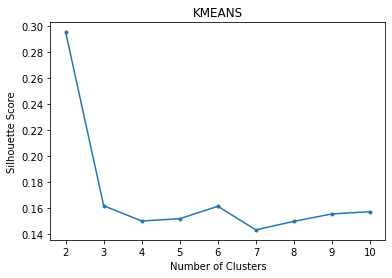

In [7]:
# Visualiza diferentes puntuaciones de silueta KMEANS
sil = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  sil.append(silhouette_score(X, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), sil, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
plt.title('KMEANS');

In [9]:
#Algoritmo KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
df['KMEAN'] = kmeans.labels_
silhouette_score(X, kmeans.labels_)

0.2940540495702587

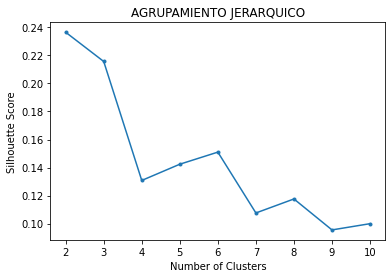

In [10]:
# Visualiza diferentes puntuaciones de silueta AGRUPAMIENTO JERARQUICO
sil = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters = i)
  hc.fit(X)
  sil.append(silhouette_score(X, hc.labels_))
# Visualize scores
plt.plot(range(2, 11), sil, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('AGRUPAMIENTO JERARQUICO');

In [12]:
#Algoritmo AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(X)
df['AGRUP'] = hc.labels_
silhouette_score(X, hc.labels_)

0.23660607668030084

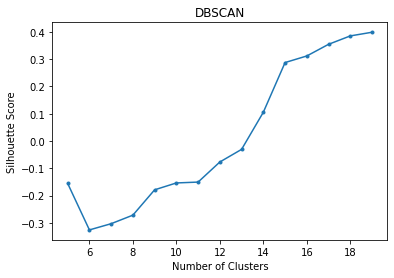

In [30]:
sil = []
for i in range(5, 20):
  j=i/10
  dbs = DBSCAN(eps = j, min_samples = 5).fit(X)
  sil.append(silhouette_score(X, dbs.labels_))
# Visualize scores
plt.plot(range(5, 20), sil, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN');

In [43]:
#Algoritmo DBSCAN
dbs = DBSCAN(eps = 1.5, min_samples = 5).fit(X)
df['DBSCAN'] = dbs.labels_
silhouette_score(X, dbs.labels_)

0.2872312480821164

In [45]:
df['KMEAN'].value_counts()

0    655
1    195
Name: KMEAN, dtype: int64

In [46]:
df['AGRUP'].value_counts()

1    612
0    238
Name: AGRUP, dtype: int64

In [44]:
df['DBSCAN'].value_counts()

 0    679
-1    171
Name: DBSCAN, dtype: int64

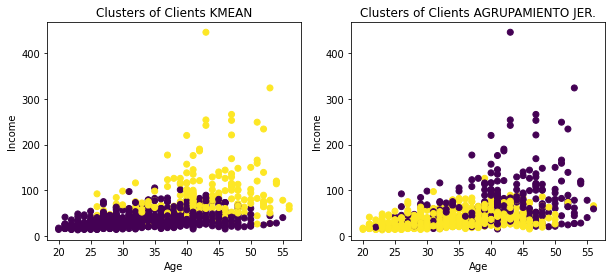

In [41]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(df['Age'], df['Income'], c = df['KMEAN'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters of Clients KMEAN');
plt.subplot(122)
plt.scatter(df['Age'], df['Income'], c = df['AGRUP'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters of Clients AGRUPAMIENTO JER.');

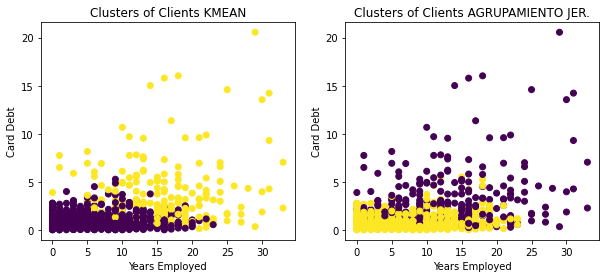

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(df['Years Employed'], df['Card Debt'], c = df['KMEAN'])
plt.xlabel('Years Employed')
plt.ylabel('Card Debt')
plt.title('Clusters of Clients KMEAN');
plt.subplot(122)
plt.scatter(df['Years Employed'], df['Card Debt'], c = df['AGRUP'])
plt.xlabel('Years Employed')
plt.ylabel('Card Debt')
plt.title('Clusters of Clients AGRUPAMIENTO JER.');

##Parte 2
¿Qué algoritmo de agrupación en clústeres es mejor para estos datos y por qué?

**Es mejor KMEAN**, acorde a las métricas de agrupamiento se sugiere tener 2 grupos y KMEAN se aprecia una mejor segmentación de los datos. 

El algoritmo DBSCAN no sirve en esta aplicación, sólo logra sacar 1 grupo y el resto (-1) son ruido.